In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5

mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

In [79]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
data = pd.read_csv('data/train_hpc.csv', index_col=0)
print(f"DataFrame shape is {data.shape}")
data.head()

DataFrame shape is (1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Проверим распределение таргета

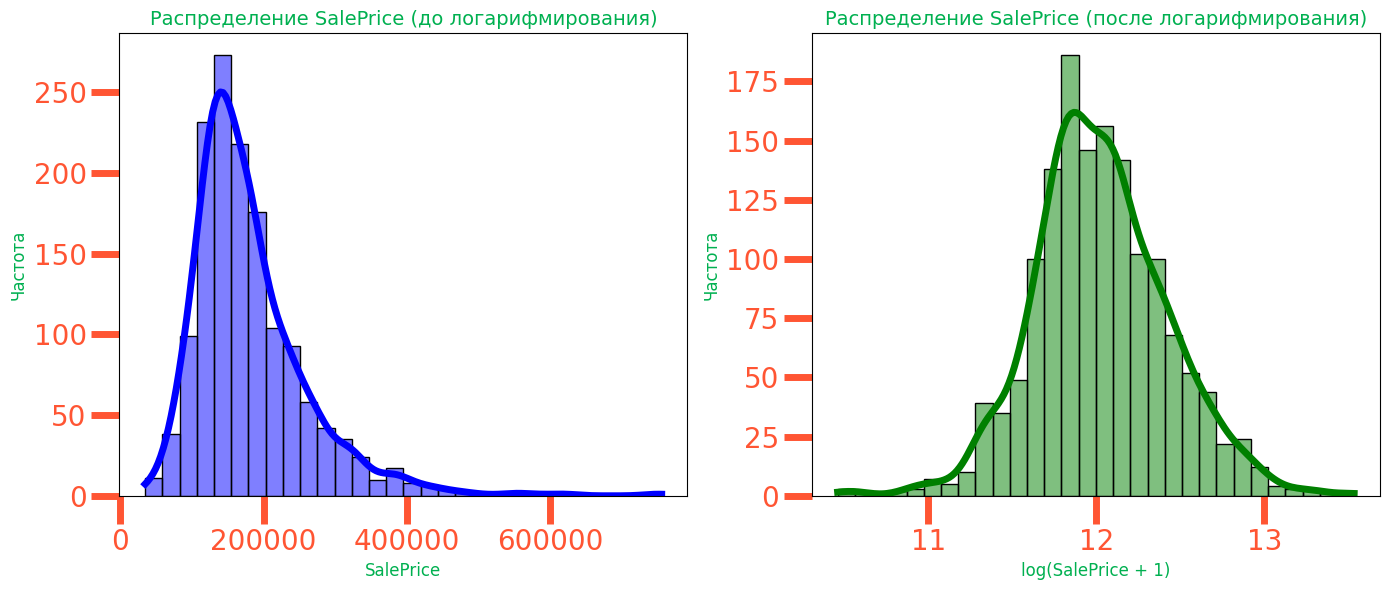

In [82]:
import numpy as np

plt.figure(figsize=(14, 6))

# Оригинальное распределение
plt.subplot(1, 2, 1)
sns.histplot(data['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Распределение SalePrice (до логарифмирования)', fontsize=14)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Частота', fontsize=12)

# Логарифмированное распределение
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data['SalePrice']), kde=True, bins=30, color='green')
plt.title('Распределение SalePrice (после логарифмирования)', fontsize=14)
plt.xlabel('log(SalePrice + 1)', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.tight_layout()
plt.show()

In [83]:
# Проведём логарифмирование таргета, так как он сильно смещён вправо

data['SalePrice'] = np.log1p(data['SalePrice'])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


#### Исследуем общую информацию о данных

In [84]:
train_summary = {
    "Количество строк и столбцов": data.shape,
    "Типы данных": data.dtypes.value_counts(),
    "Пропущенные значения (NaN)": data.isnull().sum().sum(),
    "Столбцы с NaN": data.isnull().sum()[data.isnull().sum() > 0]
}
train_summary

{'Количество строк и столбцов': (1460, 80),
 'Типы данных': object     43
 int64      33
 float64     4
 Name: count, dtype: int64,
 'Пропущенные значения (NaN)': 7829,
 'Столбцы с NaN': LotFrontage      259
 Alley           1369
 MasVnrType       872
 MasVnrArea         8
 BsmtQual          37
 BsmtCond          37
 BsmtExposure      38
 BsmtFinType1      37
 BsmtFinType2      38
 Electrical         1
 FireplaceQu      690
 GarageType        81
 GarageYrBlt       81
 GarageFinish      81
 GarageQual        81
 GarageCond        81
 PoolQC          1453
 Fence           1179
 MiscFeature     1406
 dtype: int64}

#### Работа с пропущенными значениями

In [85]:
# Рассчитаем долю пропущенных значений 
train_missing_ratio = (data.isnull().sum() / len(data)).sort_values(ascending=False)

# Выделим столбцы с пропусками > 50%
data_hight_missing = train_missing_ratio[train_missing_ratio > 0.5]
data_hight_missing

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
dtype: float64

In [86]:
# Удалим колонки, где > 80% пропусков, так как их восстановление не имеет смысла
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']

data_cleaned = data.drop(columns=columns_to_drop, axis=1)
data_cleaned.shape

(1460, 76)

In [87]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Определим числовые и категориальные признаки
numeric_features = data_cleaned.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
categorical_features = data_cleaned.select_dtypes(include='object').columns

# Определение импутера для заполнения пропусков
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Создание трансформера обработки данных
preprocessor_for_missing = ColumnTransformer(
    transformers=[
        ('num', numeric_imputer, numeric_features),
        ('cat', categorical_imputer, categorical_features)
    ]
)

# Применим трансформер к данным
data_imputed = preprocessor_for_missing.fit_transform(data_cleaned)
data_cleaned_imputed = pd.DataFrame(data_imputed, columns=numeric_features.tolist() + categorical_features.tolist())

In [88]:
data_cleaned_imputed['SalePrice'] = data_cleaned['SalePrice'].values
data_cleaned_imputed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,12.247699
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,12.109016
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,12.317171
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,11.849405
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,12.429220


In [89]:
# Проверим, все ли пропуски устранены
remaining_missing_train = data_cleaned_imputed.isnull().sum().sum()
remaining_missing_train

0

#### Проведём EDA анализ признаков

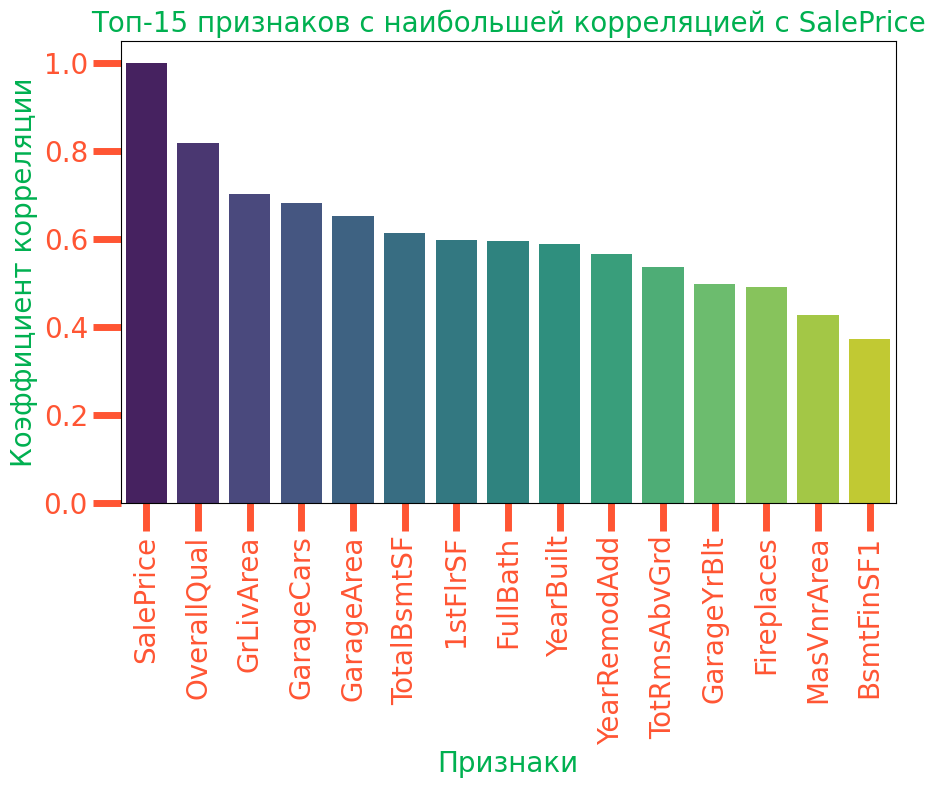

In [90]:
# Корреляция SalePrice с числовыми признаками

for col in numeric_features:
    data_cleaned_imputed[col] = data_cleaned_imputed[col].astype(float)

numeric_data = data_cleaned_imputed.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()
top_corr_features = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Визуализация корреляции
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.index[:15], y=top_corr_features.values[:15], palette="viridis")
plt.xticks(rotation=90)
plt.title("Топ-15 признаков с наибольшей корреляцией с SalePrice")
plt.xlabel("Признаки")
plt.ylabel("Коэффициент корреляции")
plt.show()

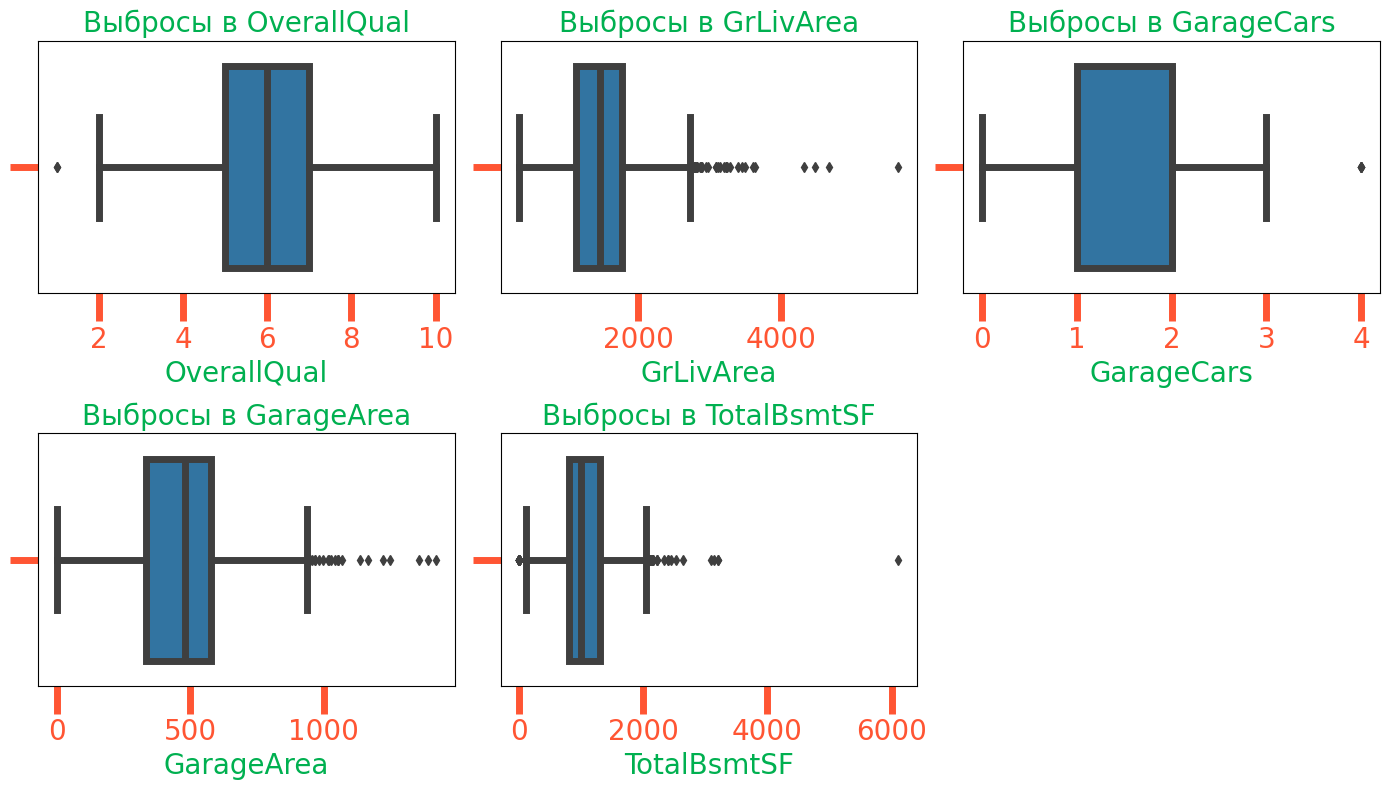

In [91]:
# Проверка выбросов по самым важным числовым признакам (через boxplot)
top_features = top_corr_features.index[1:6]  # Берем топ-5 фич (пропускаем SalePrice)

plt.figure(figsize=(14, 8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data_cleaned_imputed[feature])
    plt.title(f"Выбросы в {feature}")
plt.tight_layout()
plt.show()

In [92]:
# Создание новых признаков
data_cleaned_imputed["HouseAge"] = data_cleaned_imputed["YrSold"] - data_cleaned_imputed["YearBuilt"]
data_cleaned_imputed["RemodAge"] = data_cleaned_imputed["YrSold"] - data_cleaned_imputed["YearRemodAdd"]
data_cleaned_imputed["TotalSF"] = data_cleaned_imputed["TotalBsmtSF"] + data_cleaned_imputed["1stFlrSF"] + data_cleaned_imputed["2ndFlrSF"]
data_cleaned_imputed["Bathrooms"] = data_cleaned_imputed["FullBath"] + (0.5 * data_cleaned_imputed["HalfBath"])
data_cleaned_imputed["RoomsPerSF"] = data_cleaned_imputed["TotRmsAbvGrd"] / data_cleaned_imputed["TotalSF"]

In [93]:
data_cleaned_imputed.shape

(1460, 81)

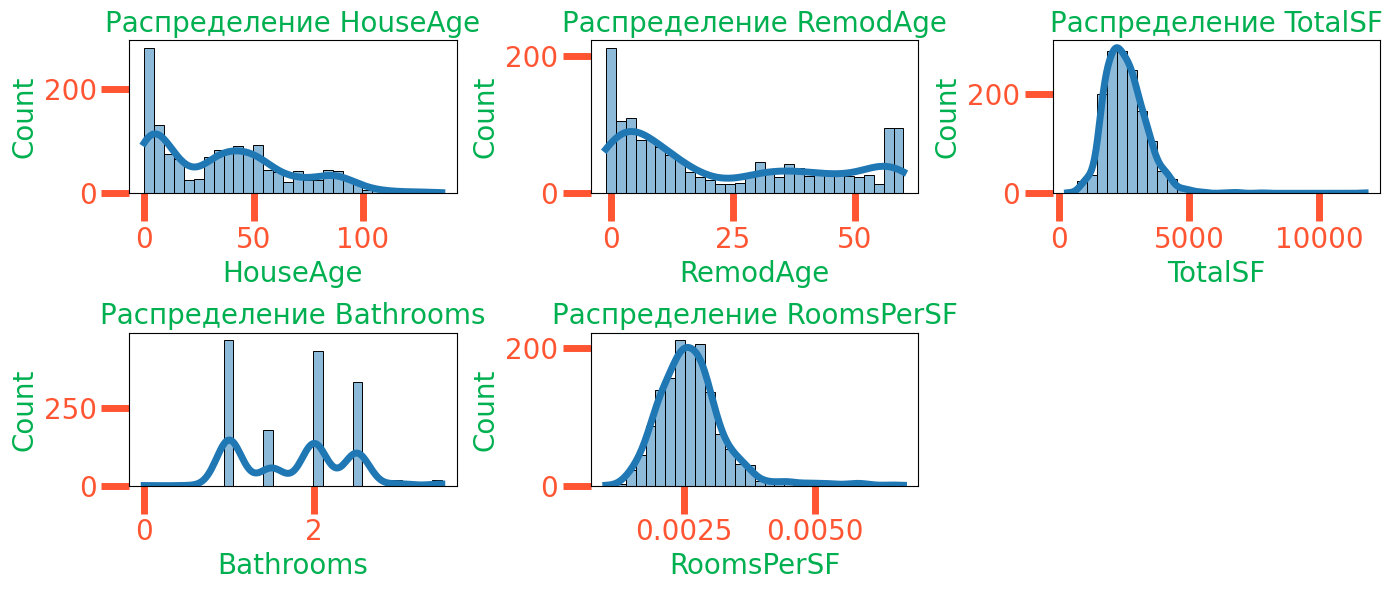

In [94]:
new_features = ["HouseAge", "RemodAge", "TotalSF", "Bathrooms", "RoomsPerSF"]
data_cleaned_imputed[new_features].describe()

# Визуализация распределения новых фичей
plt.figure(figsize=(14, 6))
for i, feature in enumerate(new_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data_cleaned_imputed[feature], kde=True, bins=30)
    plt.title(f"Распределение {feature}")
plt.tight_layout()
plt.show()

In [95]:
# 1. Коэффициенты полезной площади
data_cleaned_imputed["SF_LotRatio"] = data_cleaned_imputed["TotalBsmtSF"] / data_cleaned_imputed["LotArea"]

# 2. Разница между годами
data_cleaned_imputed["GarageAge"] = data_cleaned_imputed["YrSold"] - data_cleaned_imputed["GarageYrBlt"]
data_cleaned_imputed["HouseAgeRatio"] = data_cleaned_imputed["HouseAge"] / data_cleaned_imputed["YrSold"]

# 3. Объединение категорий
data_cleaned_imputed["QualityIndex"] = data_cleaned_imputed["OverallQual"] * data_cleaned_imputed["OverallCond"]

# 4. Бинарные признаки (факт наличия фичи)
data_cleaned_imputed["HasBasement"] = (data_cleaned_imputed["TotalBsmtSF"] > 0).astype(int)
data_cleaned_imputed["HasGarage"] = (data_cleaned_imputed["GarageArea"] > 0).astype(int)
data_cleaned_imputed["HasFireplace"] = (data_cleaned_imputed["Fireplaces"] > 0).astype(int)
data_cleaned_imputed["HasPool"] = (data_cleaned_imputed["PoolArea"] > 0).astype(int)
data_cleaned_imputed["Has2ndFloor"] = (data_cleaned_imputed["2ndFlrSF"] > 0).astype(int)

numeric_data = data_cleaned_imputed.select_dtypes(include=['number'])

#  Проверяем корреляцию новых фич с SalePrice
new_corr_features = numeric_data.corr()["SalePrice"].sort_values(ascending=False)
new_corr_features[:20]

SalePrice       1.000000
OverallQual     0.817185
TotalSF         0.777297
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
Bathrooms       0.639320
TotalBsmtSF     0.612134
QualityIndex    0.606873
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
TotRmsAbvGrd    0.534422
HasFireplace    0.510026
GarageYrBlt     0.495794
Fireplaces      0.489450
MasVnrArea      0.426776
BsmtFinSF1      0.372023
LotFrontage     0.335292
Name: SalePrice, dtype: float64

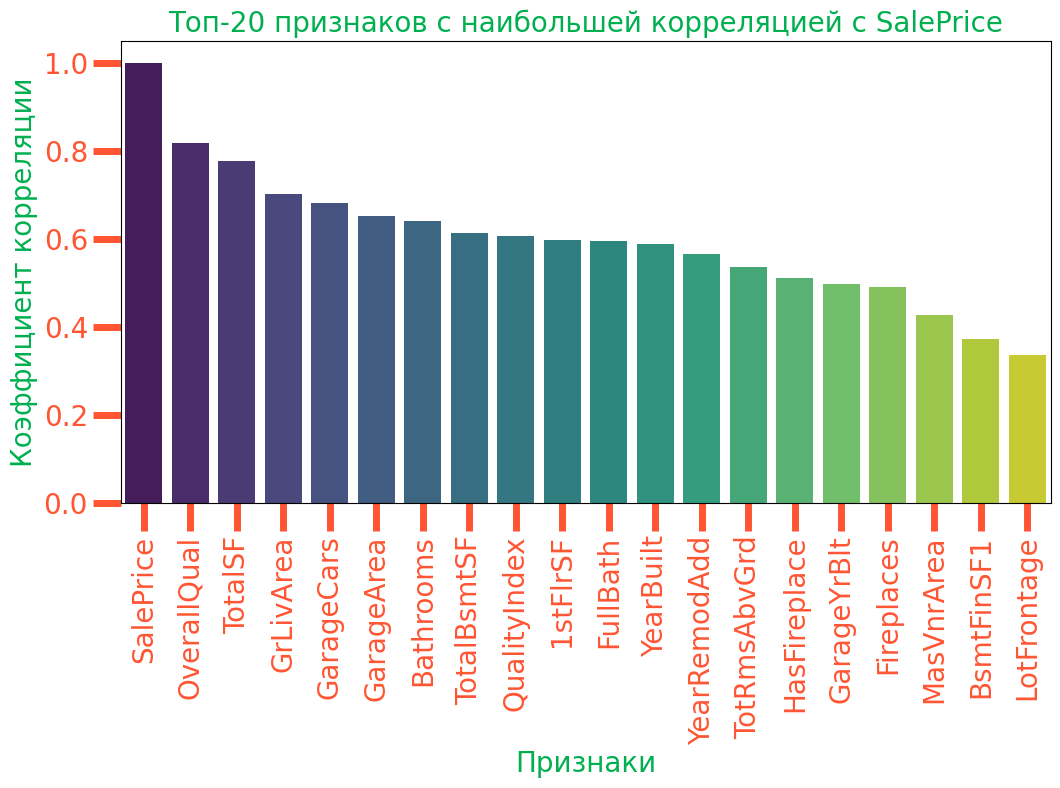

In [96]:
# Визуализация топ-20 признаков
plt.figure(figsize=(12, 6))
sns.barplot(x=new_corr_features.index[:20], y=new_corr_features.values[:20], palette="viridis")
plt.xticks(rotation=90)
plt.title("Топ-20 признаков с наибольшей корреляцией с SalePrice")
plt.xlabel("Признаки")
plt.ylabel("Коэффициент корреляции")
plt.show()

#### Проведём экнкодинг категориальных фичей

In [97]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data_cleaned_imputed[col] = le.fit_transform(data_cleaned_imputed[col])
    label_encoders[col] = le  # Сохраняем энкодеры для возможного использования в API

# Проверим, что больше нет категориальных признаков
non_numeric_columns = data_cleaned_imputed.select_dtypes(exclude=['number']).columns

# Выведем список нечисловых колонок (если остались)
non_numeric_columns

Index([], dtype='object')

In [98]:
data_cleaned_imputed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,RoomsPerSF,SF_LotRatio,GarageAge,HouseAgeRatio,QualityIndex,HasBasement,HasGarage,HasFireplace,HasPool,Has2ndFloor
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.003118,0.101302,5.0,0.002490,35.0,1,1,0,0,1
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.002377,0.131458,31.0,0.015446,48.0,1,1,1,0,0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.002217,0.081778,7.0,0.003486,35.0,1,1,1,0,1
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.002831,0.079162,8.0,0.045364,35.0,1,1,1,0,1
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.002692,0.080295,8.0,0.003984,40.0,1,1,1,0,1


In [99]:
data_types = data_cleaned_imputed.dtypes

unique_types = data_types.unique()
print("Уникальные типы данных в DataFrame:", unique_types)

data_types.value_counts()


Уникальные типы данных в DataFrame: [dtype('float64') dtype('int32')]


float64    46
int32      44
Name: count, dtype: int64

In [100]:
data_cleaned_imputed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,RoomsPerSF,SF_LotRatio,GarageAge,HouseAgeRatio,QualityIndex,HasBasement,HasGarage,HasFireplace,HasPool,Has2ndFloor
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.003118,0.101302,5.0,0.002490,35.0,1,1,0,0,1
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.002377,0.131458,31.0,0.015446,48.0,1,1,1,0,0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.002217,0.081778,7.0,0.003486,35.0,1,1,1,0,1
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.002831,0.079162,8.0,0.045364,35.0,1,1,1,0,1
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.002692,0.080295,8.0,0.003984,40.0,1,1,1,0,1


In [101]:
data_cleaned_imputed = data_cleaned_imputed.clip(upper=data_cleaned_imputed.quantile(0.99), lower=data_cleaned_imputed.quantile(0.01), axis=1)


In [102]:
data_cleaned_imputed.shape

(1460, 90)